In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
# load dataset
df = pd.read_csv('fullclean.csv')

C:\Users\prashanth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...
2,2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...
3,3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large..."
4,4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568186 entries, 0 to 568185
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              568186 non-null  int64 
 1   ProductId               568186 non-null  object
 2   UserId                  568186 non-null  object
 3   ProfileName             568186 non-null  object
 4   HelpfulnessNumerator    568186 non-null  int64 
 5   HelpfulnessDenominator  568186 non-null  int64 
 6   Score                   568186 non-null  int64 
 7   Time                    568186 non-null  object
 8   ReviewSummary           568186 non-null  object
 9   ReviewText              568186 non-null  object
dtypes: int64(4), object(6)
memory usage: 43.3+ MB


In [5]:
# considering 4-5 as positive and 1-2 as negative rating
df_temp = df[df.Score != 3]

In [6]:
# removing the score 0
df_temp = df_temp[df_temp.Score != 0]

In [7]:
df_temp.head()

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...
2,2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...
3,3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large..."
4,4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...


In [8]:
df_temp.shape

(525375, 10)

In [9]:
# check unique score
df_temp.Score.unique()

array([5, 1, 2, 4], dtype=int64)

In [10]:
# drop unnamed column
df_temp.drop('Unnamed: 0',axis = 1,inplace = True)

In [11]:
df_temp.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...


In [12]:
# considering score 5,4 as positive and 2,1 as negative
df_temp['Rating'] = df_temp.Score.apply(lambda x :  'Positive'    if x == 5 or x == 4 else 'Negative')

In [13]:
df_temp.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Rating
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,Positive
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...,Positive
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...,Negative
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large...",Negative
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...,Positive


In [14]:
# check rating count
df_temp['Rating'].value_counts(normalize=True)

Positive    0.843723
Negative    0.156277
Name: Rating, dtype: float64

In [25]:
# considering 25% sample from population/dataset
df_samp = df_temp.sample(frac =.25)
df_samp.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Rating
25015,B003VIWN94,A29S6RS49WJSRO,peachie,2,2,5,1295308800,"dogs,too,are what they eat","we thought lily,at only 6 years of age, had a...",Positive
85222,B00028HN46,A1HTP3GJYF26RI,"Edward S. Golden ""nedlog""",0,1,4,1339113600,Sojos original,I didn't mean to order a 40-pound bag. But I ...,Positive
27053,B005ZBZM52,A5AQ7EK92B9L4,"George A. Messick ""Live Long and Prosper""",1,1,5,1344643200,Great cup of coffee for less........,Really wasn't expecting much from these K-cup...,Positive
93431,B0027E2MT4,A34OENF1VQ9N65,sharkgirlsheena,0,0,5,1316908800,Baby loves it!,My 10 month old son LOVES this baby food! He ...,Positive
395067,B004IXWMG0,A2RTN6CQRKZPIN,Morgan,0,0,1,1349049600,If I could give no stars,Um my mother described these as chips that we...,Negative


In [26]:
X = df_samp[['ReviewText']]

In [27]:
y = df_samp['Rating']

## Data preprocessing

In [28]:
# import required libraries
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [29]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [30]:
def preprocess(raw_text,flag):
    # Removing special character and digits
    sentence = re.sub("[^a-zA-Z]"," ",raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()
    
    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words
    clean_tokens = [t for t in tokens if not t in stopwords.words('english')]
    
    # stemming/lemmitization
    
    if flag == 'stem':
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens),len(clean_tokens)])
    

In [31]:
# import tqdm library
from tqdm import tqdm, tqdm_notebook

In [32]:
tqdm.pandas()

In [33]:
# stemming Review text
temp_df = X['ReviewText'].progress_apply(lambda x : preprocess(x,'stem'))

100%|████████████████████████████████████████████████████████████████████████| 131344/131344 [4:24:50<00:00,  8.27it/s]


In [34]:
temp_df.head()

,0,1
25015,thought lili year age year left live weak sick...,107
85222,mean order pound bag wow lot food sure mix pro...,16
27053,realli expect much k cup give tri consid price...,44
93431,month old son love babi food love anyth appl b...,13
395067,um mother describ chip went terribl wrong neve...,31


In [35]:
# changing column names
temp_df.columns = ['clean_text_stem','text_length_stem']
temp_df.head()

,clean_text_stem,text_length_stem
25015,thought lili year age year left live weak sick...,107
85222,mean order pound bag wow lot food sure mix pro...,16
27053,realli expect much k cup give tri consid price...,44
93431,month old son love babi food love anyth appl b...,13
395067,um mother describ chip went terribl wrong neve...,31


In [36]:
# concating temp_df and X
X = pd.concat([X,temp_df],axis = 1)
X.head()

,ReviewText,clean_text_stem,text_length_stem
25015,"we thought lily,at only 6 years of age, had a...",thought lili year age year left live weak sick...,107
85222,I didn't mean to order a 40-pound bag. But I ...,mean order pound bag wow lot food sure mix pro...,16
27053,Really wasn't expecting much from these K-cup...,realli expect much k cup give tri consid price...,44
93431,My 10 month old son LOVES this baby food! He ...,month old son love babi food love anyth appl b...,13
395067,Um my mother described these as chips that we...,um mother describ chip went terribl wrong neve...,31


In [37]:
# lemmatizing Review Text
temp_df = X['ReviewText'].progress_apply(lambda x : preprocess(x,'lemma'))

100%|████████████████████████████████████████████████████████████████████████| 131344/131344 [3:02:24<00:00, 12.00it/s]


In [38]:
# changing column names
temp_df.columns = ['clean_text_lemma','text_length_lemma']
temp_df.head()

,clean_text_lemma,text_length_lemma
25015,thought lily year age year left live weak sick...,107
85222,mean order pound bag wow lot food sure mix pro...,16
27053,really expecting much k cup give try consideri...,44
93431,month old son love baby food love anything app...,13
395067,um mother described chip went terribly wrong n...,31


In [39]:
# concating X and temp_df
X = pd.concat([X,temp_df],axis = 1)

X.head()

,ReviewText,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
25015,"we thought lily,at only 6 years of age, had a...",thought lili year age year left live weak sick...,107,thought lily year age year left live weak sick...,107
85222,I didn't mean to order a 40-pound bag. But I ...,mean order pound bag wow lot food sure mix pro...,16,mean order pound bag wow lot food sure mix pro...,16
27053,Really wasn't expecting much from these K-cup...,realli expect much k cup give tri consid price...,44,really expecting much k cup give try consideri...,44
93431,My 10 month old son LOVES this baby food! He ...,month old son love babi food love anyth appl b...,13,month old son love baby food love anything app...,13
395067,Um my mother described these as chips that we...,um mother describ chip went terribl wrong neve...,31,um mother described chip went terribly wrong n...,31


In [41]:
# Text to vector using BOW
# import countvectorizer 
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()
vocab.fit(X['clean_text_lemma'])
X_bow = vocab.transform(X['clean_text_lemma'])

In [42]:
X_bow

<131344x54305 sparse matrix of type '<class 'numpy.int64'>'
	with 4276449 stored elements in Compressed Sparse Row format>

In [43]:
print('Toral unique words:', len(vocab.vocabulary_))
print('Type of train features:', type(X_bow))
print('shape of input data:', X_bow.shape)

Toral unique words: 54305
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
shape of input data: (131344, 54305)


In [46]:
# one hot encoding of y 
y = pd.get_dummies(y,drop_first=True)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_bow,y,train_size=0.3,random_state=100)

In [51]:
X_train.shape

(39403, 54305)

## Model selection

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\prashanth\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\prashanth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
y_test_pred = classifier.predict(X_test)

In [68]:
from sklearn import metrics

print(accuracy_score(y_test,y_test_pred))

print(classification_report(y_test,y_test_pred))

0.9200900577544294
              precision    recall  f1-score   support

           0       0.78      0.68      0.72     14327
           1       0.94      0.97      0.95     77614

    accuracy                           0.92     91941
   macro avg       0.86      0.82      0.84     91941
weighted avg       0.92      0.92      0.92     91941



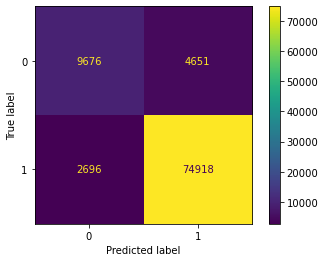

In [69]:
metrics.plot_confusion_matrix(classifier, X_test, y_test)

### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
y_test_pred = classifier.predict(X_test)

In [72]:
print(accuracy_score(y_test,y_test_pred))

print(classification_report(y_test,y_test_pred))

0.8667841333028791
              precision    recall  f1-score   support

           0       0.58      0.54      0.56     14327
           1       0.92      0.93      0.92     77614

    accuracy                           0.87     91941
   macro avg       0.75      0.73      0.74     91941
weighted avg       0.86      0.87      0.86     91941



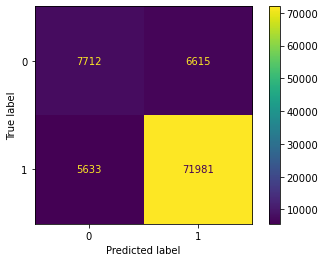

In [73]:
metrics.plot_confusion_matrix(classifier, X_test, y_test)

### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

C:\Users\PRASHA~1\AppData\Local\Temp/ipykernel_12028/1924792181.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train,y_train)


RandomForestClassifier()

In [75]:
y_test_pred = classifier.predict(X_test)

In [76]:
print(accuracy_score(y_test,y_test_pred))

print(classification_report(y_test,y_test_pred))

0.8858289555258263
              precision    recall  f1-score   support

           0       0.97      0.28      0.43     14327
           1       0.88      1.00      0.94     77614

    accuracy                           0.89     91941
   macro avg       0.93      0.64      0.68     91941
weighted avg       0.90      0.89      0.86     91941



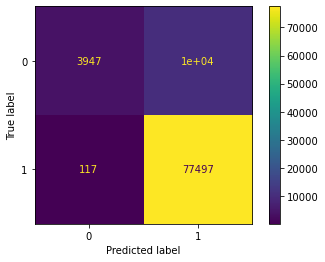

In [77]:
metrics.plot_confusion_matrix(classifier, X_test, y_test)

### Naive bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

C:\Users\prashanth\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

In [62]:
y_test_pred = classifier.predict(X_test)

In [63]:
print(accuracy_score(y_test,y_test_pred))

print(classification_report(y_test,y_test_pred))

0.8998596926289686
              precision    recall  f1-score   support

           0       0.78      0.49      0.61     14327
           1       0.91      0.97      0.94     77614

    accuracy                           0.90     91941
   macro avg       0.85      0.73      0.77     91941
weighted avg       0.89      0.90      0.89     91941



### conclusion : 
- Accuracy and Precision is high in logistic Regression